In [ ]:
#!pip install matplotlib_inline

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load datasets
nyc_category_counts = pd.read_csv('nyc_category_counts.csv')
nyc_category_frequencies = pd.read_csv('nyc_category_frequencies.csv')
nyc_health_borough = pd.read_csv('nyc_health_borough.csv')

In [ ]:
# Set copies not to change original dataframe
nyc_health_boroughDBS = nyc_health_borough.copy()
nyc_health_boroughDBS.head()

,Unnamed: 0,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294


In [ ]:
# Isolate Category, Neighborhood Lat and Lon for plotting purposes
df = nyc_health_boroughDBS[['Category', 'Latitude_x', 'Longitude_x']]
df.head()

,Category,Latitude_x,Longitude_x
0,Optometrist,40.898682,-73.849352
1,Dentist,40.875278,-73.828492
2,Dentist,40.871558,-73.830285
3,Medical Center,40.873701,-73.826771
4,Physician,40.877116,-73.828470


## Define Plot Clusters Function using DBSCANS

In [ ]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    """
    Creates a scatter plot and assigns colours to data point according to 
    clustering labels.
    """
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    
    
    plt.grid()
    plt.show()

## Clustering Care Facilities in NYC

In [ ]:
y_df = df['Category'] # Set y df to category
x_df = df.drop(['Category'], axis=1) # set x df to lat lon of all care facility venues
X = x_df.to_numpy() # convert x df into 2-dimensional numpy array

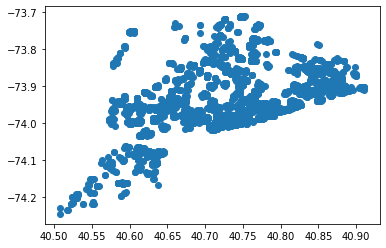

In [ ]:
plt.scatter(X[:,0], X[:,1]) # Plot lat lon of all care facility venues
plt.show()

## Optimal Epsilon

In [ ]:
# Nearest neighbor method to determine the optimal epsilon score
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

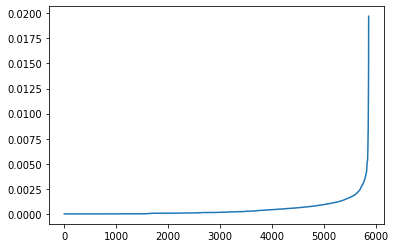

In [ ]:
# plot nearest neighbor method to visualize optimal epsilon
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
# Set db with DBSCANS optimal parameters
db = DBSCAN(eps=0.007,
            min_samples=4,
            metric='euclidean')

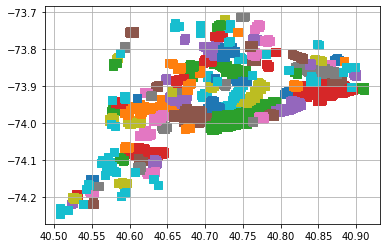

In [ ]:
# Fit and predict the optimal parameters over lat lon of dentist offices
y_db = db.fit_predict(X)

plot_clusters(X,y_db)